### Necessary imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

### One Time pre-processing required to Convert the dataset from .arff format to .csv format and store it for future use.

In [2]:
# Load Dataset
path_to_dataset = './Training Dataset.arff'
data = arff.loadarff(path_to_dataset)
df = pd.DataFrame(data[0])

# Convert the data from byte format to strings
cols = list(df.columns)
csv_dataset = []

for i in range(len(df)):
    row = list(df.iloc[i])
    new_row = [val.decode('utf-8') for val in row]    
    csv_dataset.append(new_row)

# Convert the list of strings to np array
csv_dataset = np.array(csv_dataset)

# Convert the np array to pandas dataframe
df_updated = pd.DataFrame(csv_dataset, columns = cols)

# Save the data frame as CSV file
df_updated.to_csv('dataset.csv')

### Import the dataset

In [3]:
path_to_dataset_csv = './dataset.csv'
data = pd.read_csv(path_to_dataset_csv,index_col=0)
data.shape

(11055, 31)

### Drop any null/nan values

In [4]:
data = data.dropna()
data.shape

(11055, 31)

### Check for counts of different values

In [5]:
cols = list(df.columns)
for col in cols:
    print(col)
    cnt = data[col].value_counts()
    for val in cnt.index.values:
        print (val, '-->', cnt[val])
    print ()

having_IP_Address
1 --> 7262
-1 --> 3793

URL_Length
-1 --> 8960
1 --> 1960
0 --> 135

Shortining_Service
1 --> 9611
-1 --> 1444

having_At_Symbol
1 --> 9400
-1 --> 1655

double_slash_redirecting
1 --> 9626
-1 --> 1429

Prefix_Suffix
-1 --> 9590
1 --> 1465

having_Sub_Domain
1 --> 4070
0 --> 3622
-1 --> 3363

SSLfinal_State
1 --> 6331
-1 --> 3557
0 --> 1167

Domain_registeration_length
-1 --> 7389
1 --> 3666

Favicon
1 --> 9002
-1 --> 2053

port
1 --> 9553
-1 --> 1502

HTTPS_token
1 --> 9259
-1 --> 1796

Request_URL
1 --> 6560
-1 --> 4495

URL_of_Anchor
0 --> 5337
-1 --> 3282
1 --> 2436

Links_in_tags
0 --> 4449
-1 --> 3956
1 --> 2650

SFH
-1 --> 8440
1 --> 1854
0 --> 761

Submitting_to_email
1 --> 9041
-1 --> 2014

Abnormal_URL
1 --> 9426
-1 --> 1629

Redirect
0 --> 9776
1 --> 1279

on_mouseover
1 --> 9740
-1 --> 1315

RightClick
1 --> 10579
-1 --> 476

popUpWidnow
1 --> 8918
-1 --> 2137

Iframe
1 --> 10043
-1 --> 1012

age_of_domain
1 --> 5866
-1 --> 5189

DNSRecord
1 --> 7612
-1 -->

### Check for co-relation between different features

<AxesSubplot: >

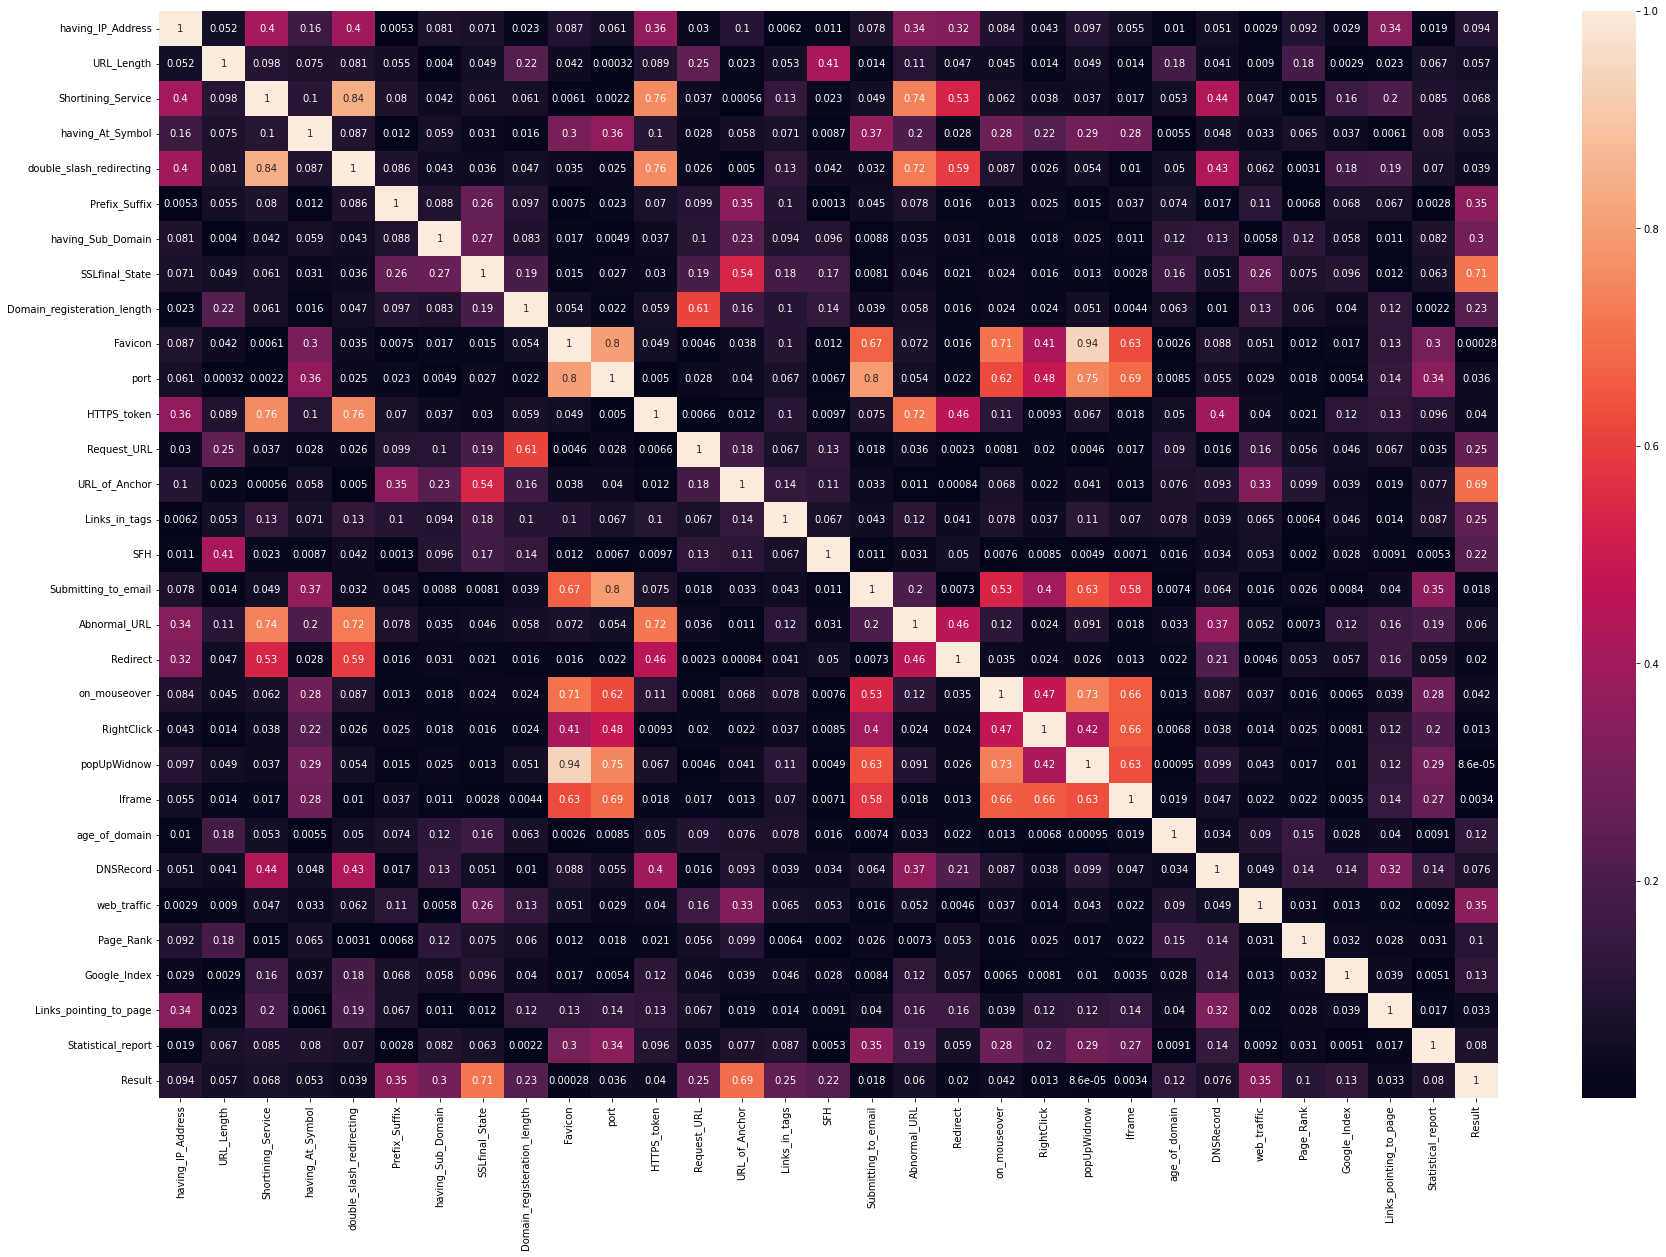

In [6]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr().abs(),  annot=True)

#### Using co-relation we can check which features affect the result more than others.

In [7]:
mean_of_corr_for_result = sum(data.corr().abs()['Result'][:-1])/len(data.corr().abs()['Result'][:-1])
cols_with_corr_greater_than_mean = {}

for col in data.corr().abs()['Result'][:-1].index:
    if data.corr().abs()['Result'][:-1][col] > mean_of_corr_for_result:
        cols_with_corr_greater_than_mean[col] = data.corr().abs()['Result'][:-1][col]
print (cols_with_corr_greater_than_mean)

{'Prefix_Suffix': 0.34860557031815537, 'having_Sub_Domain': 0.2983233237700886, 'SSLfinal_State': 0.7147411951750106, 'Domain_registeration_length': 0.22578946245861145, 'Request_URL': 0.25337227167184123, 'URL_of_Anchor': 0.6929345205555705, 'Links_in_tags': 0.248228515390874, 'SFH': 0.22141900810344317, 'web_traffic': 0.346103108029068}


In [8]:
data2 = data[cols_with_corr_greater_than_mean.keys()]

In [9]:
data2

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic
0,-1,-1,-1,-1,1,-1,1,-1,-1
1,-1,0,1,-1,1,0,-1,-1,0
2,-1,-1,-1,-1,1,0,-1,-1,1
3,-1,-1,-1,1,-1,0,0,-1,1
4,-1,1,1,-1,1,0,0,-1,0
...,...,...,...,...,...,...,...,...,...
11050,1,1,1,-1,1,1,1,-1,-1
11051,-1,1,-1,-1,1,-1,-1,0,1
11052,-1,1,-1,-1,1,0,-1,-1,1
11053,-1,-1,-1,1,-1,-1,1,-1,1


In [10]:
X = data2
Y = data['Result']
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)

epoch -> 0
epoch -> 1
epoch -> 2
epoch -> 3
epoch -> 4
epoch -> 5
epoch -> 6
epoch -> 7
epoch -> 8
epoch -> 9
epoch -> 10
epoch -> 11
epoch -> 12
epoch -> 13
epoch -> 14
epoch -> 15
epoch -> 16
epoch -> 17
epoch -> 18
epoch -> 19
epoch -> 20
epoch -> 21
epoch -> 22
epoch -> 23
epoch -> 24
epoch -> 25
epoch -> 26
epoch -> 27
epoch -> 28
epoch -> 29
epoch -> 30
epoch -> 31
epoch -> 32
epoch -> 33
epoch -> 34
epoch -> 35
epoch -> 36
epoch -> 37
epoch -> 38
epoch -> 39
epoch -> 40
epoch -> 41
epoch -> 42
epoch -> 43
epoch -> 44
epoch -> 45
epoch -> 46
epoch -> 47
epoch -> 48
epoch -> 49
epoch -> 50
epoch -> 51
epoch -> 52
epoch -> 53
epoch -> 54
epoch -> 55
epoch -> 56
epoch -> 57
epoch -> 58
epoch -> 59
epoch -> 60
epoch -> 61
epoch -> 62
epoch -> 63
epoch -> 64
epoch -> 65
epoch -> 66
epoch -> 67
epoch -> 68
epoch -> 69
epoch -> 70
epoch -> 71
epoch -> 72
epoch -> 73
epoch -> 74
epoch -> 75
epoch -> 76
epoch -> 77
epoch -> 78
epoch -> 79
epoch -> 80
epoch -> 81
epoch -> 82
epoch -> 83
ep

epoch -> 640
epoch -> 641
epoch -> 642
epoch -> 643
epoch -> 644
epoch -> 645
epoch -> 646
epoch -> 647
epoch -> 648
epoch -> 649
epoch -> 650
epoch -> 651
epoch -> 652
epoch -> 653
epoch -> 654
epoch -> 655
epoch -> 656
epoch -> 657
epoch -> 658
epoch -> 659
epoch -> 660
epoch -> 661
epoch -> 662
epoch -> 663
epoch -> 664
epoch -> 665
epoch -> 666
epoch -> 667
epoch -> 668
epoch -> 669
epoch -> 670
epoch -> 671
epoch -> 672
epoch -> 673
epoch -> 674
epoch -> 675
epoch -> 676
epoch -> 677
epoch -> 678
epoch -> 679
epoch -> 680
epoch -> 681
epoch -> 682
epoch -> 683
epoch -> 684
epoch -> 685
epoch -> 686
epoch -> 687
epoch -> 688
epoch -> 689
epoch -> 690
epoch -> 691
epoch -> 692
epoch -> 693
epoch -> 694
epoch -> 695
epoch -> 696
epoch -> 697
epoch -> 698
epoch -> 699
epoch -> 700
epoch -> 701
epoch -> 702
epoch -> 703
epoch -> 704
epoch -> 705
epoch -> 706
epoch -> 707
epoch -> 708
epoch -> 709
epoch -> 710
epoch -> 711
epoch -> 712
epoch -> 713
epoch -> 714
epoch -> 715
epoch -> 716

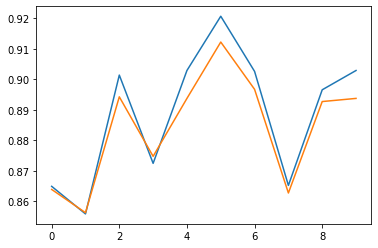

In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

test_loss = []
train_loss = []
p = Perceptron(tol=None, max_iter = 1,n_iter_no_change=100,alpha=0.0000001,warm_start=True)

for epoch in range(1000):
    
    print('epoch ->', epoch)
    p.fit(train_data, train_labels)

    predictions_train = p.predict(train_data)
    predictions_test = p.predict(test_data)

    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)

    test_loss.append(test_score)    
    train_loss.append(train_score)

plt.plot(test_loss[:10])
plt.plot(train_loss[:10])

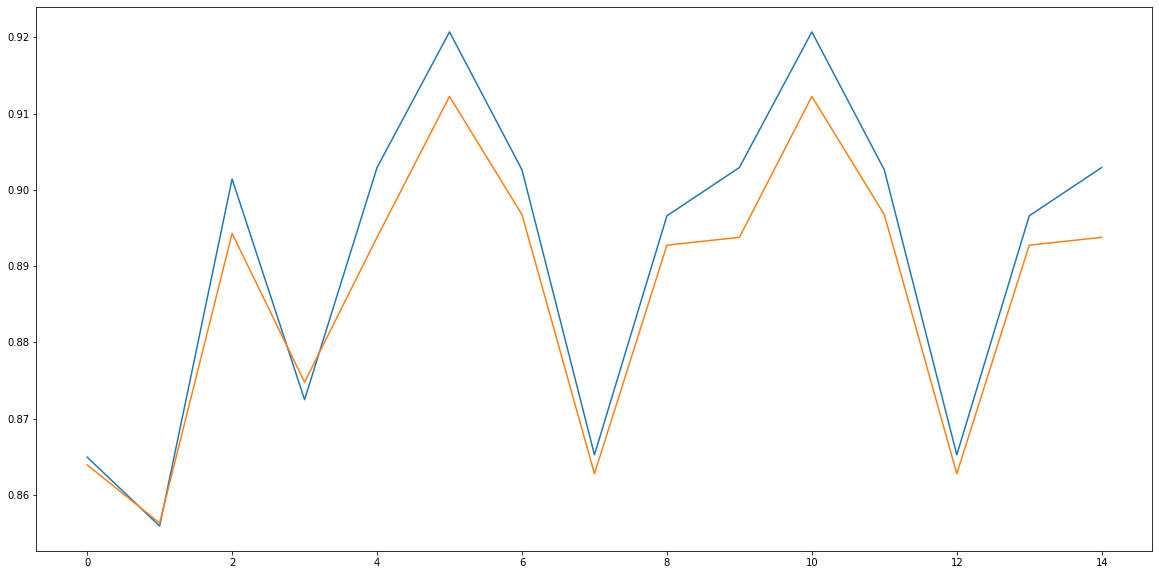

In [31]:
plt.figure(figsize=(20,10))
plt.plot(test_loss[:15])
plt.plot(train_loss[:15])

In [23]:
test_loss

[0.864938197166114,
 0.8558938800120591,
 0.9014169430208019,
 0.8724751281278263,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.896593307205306,
 0.9029243292131444,
 0.9207114862827857,
 0.902622851974676,
 0.8652396744045825,
 0.8965933